In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.misc import imread
import numpy as np
import os
import tensorflow as tf
import glob
import random
import shutil

IMG_width = 320
IMG_height = 240
IMG_channel = 1
DATASET_PATH = "./dataset_jpg_gray"
kinds = ["train", "validation", "test"]
train_img = np.array([], dtype="float32")
train_label = np.array([], dtype="int8")
validation_img = np.array([], dtype="float32")
validation_label = np.array([], dtype="int8")
test_img = np.array([], dtype="float32")
test_label = np.array([], dtype="int8")
(label_train, filename_train) = (0, 0)
(label_validation, filename_validation) = (0, 0)
(label_test, filename_test) = (0, 0)


def file_info(category_name, dataset_path=DATASET_PATH):
    # 디렉토리 상의 파일경로와 파일의 제일 앞에 매겨진 숫자정보(라벨 정보)를 긁어서 반환
    full_path =  dataset_path + '/' + category_name + '/' + '*.jpg'
    image_filenames = glob.glob(full_path)
    filename = []
    label = []
    for image_filename in image_filenames:
        filename.append(image_filename.split("/")[3])
        label.append(image_filename.split("/")[3].split("-")[0])
    return (label, filename)


def display_image(image, label):
    %matplotlib
    inline

    fig = plt.figure(figsize=(20, 5))
    for i in range(5):
        print(label[i])
        img = image[i]
        img = img.reshape(240, 320, 1)
        img.shape = (240, 320, 1)
        plt.subplot(150 + (i + 1))
        plt.imshow(img)


def data_processing_about_train(idx, kind):
    for i in range(idx):
        global train_img
        global train_label

        (labels, filenames) = file_info(kind)
        random_value = random.randrange(0, len(filenames))
        filename = filenames[random_value]
        label = labels[random_value]
        #         label = _change_one_hot_label(train_label, label)
        #         label = labels[random_value]
        #         image_display(kinds, filename)
        full_path = ( DATASET_PATH + '/' + kind + '/' + filename)
        image = imread(full_path)
        image = image.reshape(IMG_width * IMG_height * IMG_channel) / 255.0
        train_img = np.append(train_img, image)
        label = _change_one_hot_label(label)
        train_label = np.append(train_label, label)
        # file move
        # 학습한 데이터는 이동시킴
        print("---------")
        print(len(filenames))
        print(filename)
        src =  DATASET_PATH + '/' + kind + '/'
        dir =  DATASET_PATH + '/' + 'tmp' + '/' + kind + '/'
        shutil.move(src + filename, dir + filename)


def data_processing_about_validation(idx, kind):
    for i in range(idx):
        global validation_img
        global validation_label

        (labels, filenames) = file_info(kind)
        random_value = random.randrange(0, len(filenames))
        filename = filenames[random_value]
        label = labels[random_value]
        #         label = _change_one_hot_label(train_label, label)
        #         label = labels[random_value]
        #         image_display(kinds, filename)
        full_path = ( DATASET_PATH + '/' + kind + '/' + filename)
        image = imread(full_path)
        image = image.reshape(IMG_width * IMG_height * IMG_channel) / 255.0
        validation_img = np.append(validation_img, image)
        label = _change_one_hot_label(label)
        validation_label = np.append(validation_label, label)
        # file move
        print("---------")
        print(len(filenames))
        print(filename)
        src =  DATASET_PATH + '/' + kind + '/'
        dir =  DATASET_PATH + '/' + 'tmp' + '/' + kind + '/'
        shutil.move(src + filename, dir + filename)


def data_processing_about_test(idx, kind):
    for i in range(idx):
        global test_img
        global test_label

        (labels, filenames) = file_info(kind)
        random_value = random.randrange(0, len(filenames))
        filename = filenames[random_value]
        label = labels[random_value]
        #         label = _change_one_hot_label(train_label, label)
        #         label = labels[random_value]
        #         image_display(kinds, filename)
        full_path = ( DATASET_PATH + '/' + kind + '/' + filename)
        image = imread(full_path)
        image = image.reshape(IMG_width * IMG_height * IMG_channel) / 255.0
        test_img = np.append(test_img, image)
        label = _change_one_hot_label(label)
        test_label = np.append(test_label, label)
        # file move
        print("---------")
        print(len(filenames))
        print(filename)
        src =  DATASET_PATH + '/' + kind + '/'
        dir =  DATASET_PATH + '/' + 'tmp' + '/' + kind + '/'
        shutil.move(src + filename, dir + filename)


def _change_one_hot_label(target_label):
    target_label = int(target_label)
    T = np.zeros((1, 3))
    T[0][target_label] = 1

    return T


def store_dataset(dataset_path=DATASET_PATH):
    global train_img
    global train_label
    global validation_img
    global validation_label
    global test_img
    global test_label

    (_, idx_train) = file_info("train")
    (_, idx_validation) = file_info("validation")
    (_, idx_test) = file_info("test")
    if len(idx_train) != 0 or len(idx_validation) != 0 or len(idx_test) != 0:
        data_processing_about_train(len(idx_train), "train")
        data_processing_about_validation(len(idx_validation), "validation")
        data_processing_about_test(len(idx_test), "test")

        # file로 쓰기
        train_img.tofile(dataset_path + '/' + 'train_img_dataset.txt')
        train_label.tofile(dataset_path + '/' + 'train_label.txt')
        validation_img.tofile(dataset_path + '/' + 'validation_img_dataset.txt')
        validation_label.tofile(dataset_path + '/' + 'validation_label.txt')
        test_img.tofile(dataset_path + '/' + 'test_img_dataset.txt')
        test_label.tofile(dataset_path + '/' + 'test_label.txt')

    else:
        print("[!] Already Finished Generateing Dataset. Please check directory.")





def load_dataset(dataset_path):
    (img_train, label_train) = (0,0)
    (img_validation, label_validation) = (0,0)
    (img_test, label_test) = (0,0)
    filenames = glob.glob(dataset_path + "/" + "*.txt")
    filename = []
    for filename in filenames:
        print(filename, )
        if filename.split("/")[6][-4:] == ".txt": # CAUTION : filename.split("/")[directory level][-4:]
            img_train = np.fromfile(open(dataset_path + "/" + "train_img_dataset.txt", 'rb')).reshape(451,IMG_width * IMG_height * IMG_channel)
            label_train = np.fromfile(open(dataset_path + "/" + "train_label.txt", 'rb')).reshape(451, 3)
            img_validation = np.fromfile(open(dataset_path + "/" + "validation_img_dataset.txt", 'rb')).reshape(65, IMG_width * IMG_height * IMG_channel)
            label_validation = np.fromfile(open(dataset_path + "/" + "validation_label.txt", 'rb')).reshape(65,3)
            img_test = np.fromfile(open(dataset_path + "/" + "test_img_dataset.txt", 'rb')).reshape(130,IMG_width * IMG_height * IMG_channel)
            label_test = np.fromfile(open(dataset_path + "/" + "test_label.txt", 'rb')).reshape(130, 3)
    return ((img_train, label_train), (img_validation, label_validation), (img_test, label_test))

/Users/do-hyungkwon/GoogleDrive/jupyter_notebook/imdata/test_img_dataset.txt
/Users/do-hyungkwon/GoogleDrive/jupyter_notebook/imdata/test_label.txt
/Users/do-hyungkwon/GoogleDrive/jupyter_notebook/imdata/train_img_dataset.txt
/Users/do-hyungkwon/GoogleDrive/jupyter_notebook/imdata/train_label.txt
/Users/do-hyungkwon/GoogleDrive/jupyter_notebook/imdata/validation_img_dataset.txt
/Users/do-hyungkwon/GoogleDrive/jupyter_notebook/imdata/validation_label.txt
Total batch: 46
Epoch:  0, Train Error: 278624384.00000, Validation Error: 262802944.00000, Test Accuracy: 0.27692
Epoch:  1, Train Error: 65079676.00000, Validation Error: 54446616.00000, Test Accuracy: 0.39231
Epoch:  2, Train Error: 15238662.00000, Validation Error: 13867967.00000, Test Accuracy: 0.53077
Epoch:  3, Train Error: 27115820.00000, Validation Error: 26908116.00000, Test Accuracy: 0.48462
Epoch:  4, Train Error: 42666448.00000, Validation Error: 36427424.00000, Test Accuracy: 0.49231
Epoch:  5, Train Error: 24968332.00000,

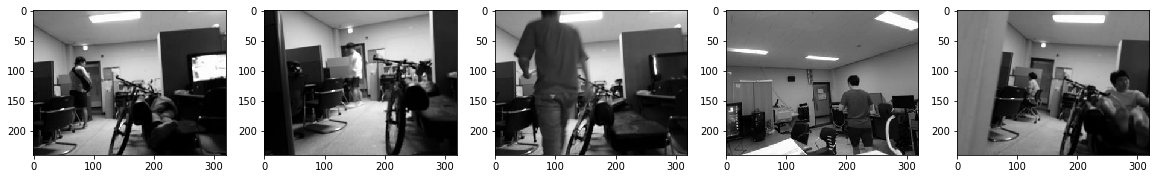

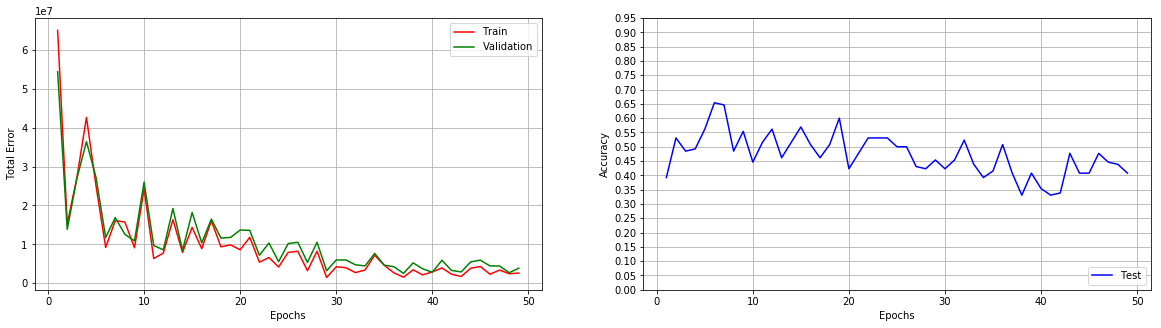

[1 2 1 1 2 2 2 0 2 1 1 2 1 1 2 2 1 1 2 2 1 1 0 1 1 1 1 1 0 1 1 1 2 0 0 1 1
 1 1 1 2 1 1 1 1 1 1 2 1 2 0 1 1 2 1 0 1 1 2 1 1 1 1 2 1 1 2 1 1 2 1 2 1 1
 1 1 1 2 1 1 1 1 1 1 1 2 1 1 0 1 2 1 1 2 1 1 2 1 2 2 2 2 1 1 1 1 2 2 1 1 1
 0 1 2 1 1 1 1 2 2 1 1 2 1 2 1 1 0 2 1]
[1 2 1 2 1 2 1 0 2 2 0 0 0 2 2 2 2 1 2 2 2 1 0 2 1 2 2 1 0 2 0 2 2 0 0 2 1
 1 1 0 2 0 2 2 2 2 2 2 1 1 2 2 1 1 2 0 0 1 2 0 2 1 0 1 2 2 0 2 2 2 2 1 1 2
 1 1 2 2 0 2 2 1 0 2 2 1 0 2 0 2 2 2 2 1 1 0 1 2 0 1 2 1 2 0 1 2 2 1 0 0 2
 0 0 0 1 1 2 2 0 1 2 2 2 0 2 1 1 2 2 2]
Number of False Prediction: 80
False Prediction Index: 3, Prediction: 1, Ground Truth: 2
False Prediction Index: 4, Prediction: 2, Ground Truth: 1
False Prediction Index: 6, Prediction: 2, Ground Truth: 1
False Prediction Index: 9, Prediction: 1, Ground Truth: 2
False Prediction Index: 10, Prediction: 1, Ground Truth: 0


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow as tf

(img_train, label_train), (img_validation, label_validation), (img_test, label_test) = load_dataset("/Users/do-hyungkwon/GoogleDrive/jupyter_notebook/imdata")

batch_size = 10
training_epochs = 50
learning_rate = 0.001

epoch_list = []
train_error_list = []
validation_error_list = []
test_accuracy_list = []
diff_index_list = []

# Network Parameters
n_input = 76800 # MNIST data input (img shape: 28*28)
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_hidden_3 = 256
n_hidden_4 = 256
n_hidden_5 = 256
n_hidden_6 = 256
n_hidden_6 = 256
n_classes = 3 # MNIST total classes (0-9 digits)
    
# Data Preparation
x = tf.placeholder(tf.float32, [None, n_input])
y_target = tf.placeholder(tf.float32, [None, n_classes])

# Model Construction
# Store layers weight & bias
weights = {
    'W1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'W2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'W3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'W4': tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4])),
    'W5': tf.Variable(tf.random_normal([n_hidden_4, n_hidden_5])),
    'W6': tf.Variable(tf.random_normal([n_hidden_5, n_hidden_6])),
    'out': tf.Variable(tf.random_normal([n_hidden_6, n_classes]))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'b4': tf.Variable(tf.random_normal([n_hidden_4])),
    'b5': tf.Variable(tf.random_normal([n_hidden_5])),
    'b6': tf.Variable(tf.random_normal([n_hidden_6])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# 1st Hidden layer with RELU activation
u2 = tf.matmul(x, weights['W1']) + biases['b1']
z2 = tf.nn.relu(u2)

# 2ndHidden layer with RELU activation
u3 = tf.matmul(z2, weights['W2']) + biases['b2']
z3 = tf.nn.relu(u3)

u4 = tf.matmul(z3, weights['W3']) + biases['b3']
z4 = tf.nn.relu(u4)

u5 = tf.matmul(z4, weights['W4']) + biases['b4']
z5 = tf.nn.relu(u5)

u6 = tf.matmul(z5, weights['W5']) + biases['b5']
z6 = tf.nn.relu(u6)

u7 = tf.matmul(z6, weights['W6']) + biases['b6']
z7 = tf.nn.relu(u7)


# Output layer with linear activation
u_out = tf.matmul(z7, weights['out']) + biases['out']

# Target Setup
error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=u_out, labels=y_target))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(error)

# Accuracy   
prediction_and_ground_truth = tf.equal(tf.argmax(u_out, 1), tf.argmax(y_target, 1))
accuracy = tf.reduce_mean(tf.cast(prediction_and_ground_truth, tf.float32))

def draw_error_values_and_accuracy():
    # Draw Error Values and Accuracy
    fig = plt.figure(figsize=(20, 5))
    plt.subplot(121)
    plt.plot(epoch_list[1:], train_error_list[1:], 'r', label='Train')
    plt.plot(epoch_list[1:], validation_error_list[1:], 'g', label='Validation')
    plt.ylabel('Total Error')
    plt.xlabel('Epochs')
    plt.grid(True)
    plt.legend(loc='upper right')

    plt.subplot(122)
    plt.plot(epoch_list[1:], test_accuracy_list[1:], 'b', label='Test')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.yticks(np.arange(0.0, 1.0, 0.05))
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.show()
    
def draw_false_prediction():
    fig = plt.figure(figsize=(20, 5))
    for i in range(5):
        j = diff_index_list[i]
        print("False Prediction Index: %s, Prediction: %s, Ground Truth: %s" % (j, prediction[j], ground_truth[j]))
        img = np.array(img_test[j])
        img.shape = (240, 320)
        plt.subplot(150 + (i+1))
        plt.imshow(img, cmap='gray')
    
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    total_batch = int(math.ceil(len(img_train)/float(batch_size)))
    print("Total batch: %d" % total_batch)    

    for epoch in range(training_epochs):
        epoch_list.append(epoch)
        # Train Error Value
        train_error_value = sess.run(error, feed_dict={x: img_train, y_target: label_train})
        train_error_list.append(train_error_value)
        
        validation_error_value = sess.run(error, feed_dict={x: img_validation, y_target: label_validation})
        validation_error_list.append(validation_error_value)
        
        test_accuracy_value = sess.run(accuracy, feed_dict={x: img_test, y_target: label_test})
        test_accuracy_list.append(test_accuracy_value) 
        print("Epoch: {0:2d}, Train Error: {1:0.5f}, Validation Error: {2:0.5f}, Test Accuracy: {3:0.5f}".format(epoch, train_error_value, validation_error_value, test_accuracy_value))
        
        
        
        for i in range(total_batch):
            batch_images= img_train[i * batch_size : i * batch_size + batch_size]
            batch_labels = label_train[i * batch_size : i * batch_size + batch_size]
            sess.run(optimizer, feed_dict={x: batch_images, y_target: batch_labels})
    

    # Draw Graph about Error Values & Accuracy Values
    draw_error_values_and_accuracy()
    
    # False Prediction Profile
    prediction = sess.run(tf.argmax(u_out, 1), feed_dict={x:img_test})
    ground_truth = sess.run(tf.argmax(y_target, 1), feed_dict={y_target:label_test})

    print(prediction)
    print(ground_truth)

    for i in range(len(img_test)):
        if (prediction[i] != ground_truth[i]):
            diff_index_list.append(i)
            
    print("Number of False Prediction:", len(diff_index_list))
    draw_false_prediction()